In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('card_transdata - with sample ID.csv')

#took out dropping median to ratio purchase price

In [10]:
# Split the data into target and predictors
y = df.fraud
X = df.drop(columns=['fraud'], axis=1)

In [11]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [12]:
# Normalize the data
X = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()), axis=0)
X.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,Unnamed: 8
0,0.005443,0.000026,0.007250,1.0,1.0,0.0,0.0,NaN
1,0.001018,0.000015,0.004816,1.0,0.0,0.0,0.0,NaN
2,0.000478,0.000068,0.001581,1.0,0.0,0.0,1.0,NaN
3,0.000211,0.000473,0.001338,1.0,1.0,0.0,1.0,NaN
4,0.004156,0.000048,0.008284,1.0,1.0,0.0,1.0,NaN


In [24]:
#drop NaN column
df = df.dropna(axis = 1, how = 'all')
#df.head()
X = df.drop(columns=['fraud'], axis=1)
X = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()), axis=0)
X.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)


In [25]:
# Instantiate the model
logreg = LogisticRegression(fit_intercept=False,C=1e12, solver='liblinear')


# Fit the model
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [26]:
# Generate predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [27]:
# How many times was the classifier correct on the training set?
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))
# 644,846 correct, ~ 86% accuracy

0    655301
1     94699
Name: fraud, dtype: int64
------------------------------------
0    0.873735
1    0.126265
Name: fraud, dtype: float64


In [ ]:
# How many times was the classifier correct on the test set?
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))
# 215,265 correct, ~ 86% accuracy

0    215016
1     34984
Name: fraud, dtype: int64
------------------------------------
0    0.860064
1    0.139936
Name: fraud, dtype: float64


In [28]:
# Calculating metrics with sklearn
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.29448087354303276
Testing Precision:  0.2923324034153352



Training Recall:  0.31659967111273524
Testing Recall:  0.3183136189994017



Training Accuracy:  0.8737346666666667
Testing Accuracy:  0.873788



Training F1-Score:  0.30513996404593313
Testing F1-Score:  0.3047702985567919


In [30]:
#Calculating metrics for test and training splits using different training sizes
training_precision = []
testing_precision = []
training_recall = []
testing_recall = []
training_accuracy = []
testing_accuracy = []
training_f1 = []
testing_f1 = []

for i in range(10, 95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100.0)
    logreg = LogisticRegression(fit_intercept=False, C=1e25, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = logreg.predict(X_test)
    y_hat_train = logreg.predict(X_train)

    training_precision.append(precision_score(y_train, y_hat_train))
    testing_precision.append(precision_score(y_test, y_hat_test))
    training_recall.append(recall_score(y_train, y_hat_train))
    testing_recall.append(recall_score(y_test, y_hat_test))
    training_accuracy.append(accuracy_score(y_train, y_hat_train))
    testing_accuracy.append(accuracy_score(y_test, y_hat_test))
    training_f1.append(f1_score(y_train, y_hat_train))
    testing_f1.append(f1_score(y_test, y_hat_test))

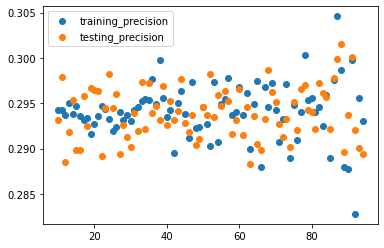

In [31]:
# Train and test precision
plt.scatter(list(range(10, 95)), training_precision, label='training_precision')
plt.scatter(list(range(10, 95)), testing_precision, label='testing_precision')
plt.legend()
plt.show()

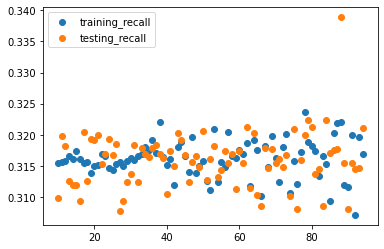

In [32]:
# Train and test recall
plt.scatter(list(range(10, 95)), training_recall, label='training_recall')
plt.scatter(list(range(10, 95)), testing_recall, label='testing_recall')
plt.legend()
plt.show()

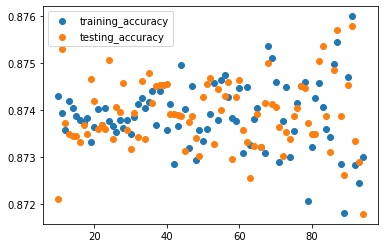

In [33]:
# Train and test accuracy
plt.scatter(list(range(10, 95)), training_accuracy, label='training_accuracy')
plt.scatter(list(range(10, 95)), testing_accuracy, label='testing_accuracy')
plt.legend()
plt.show()

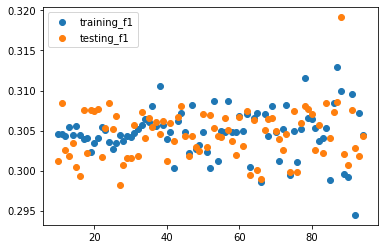

In [34]:
# Train and test F1 score
plt.scatter(list(range(10, 95)), training_f1, label='training_f1')
plt.scatter(list(range(10, 95)), testing_f1, label='testing_f1')
plt.legend()
plt.show()

Since it appears that there might be a minority issue in the data, we need to perform SMOTE. 


In [35]:
#confirming bias
print('Raw counts: \n')
print(df['fraud'].value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(df['fraud'].value_counts(normalize=True))

Raw counts: 

0    912597
1     87403
Name: fraud, dtype: int64
-----------------------------------
Normalized counts: 

0    0.912597
1    0.087403
Name: fraud, dtype: float64


,distance_from_home,distance_from_last_transaction,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1,1,0,0,0
1,10.829943,0.175592,1,0,0,0,0
2,5.091079,0.805153,1,0,0,1,0
3,2.247564,5.600044,1,1,0,1,0
4,44.190936,0.566486,1,1,0,1,0


In [37]:
# Define appropriate X and y
y = df['fraud']
X = df[['distance_from_home', 'distance_from_last_transaction', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']]
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [45]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print()

(1000000, 6)
(1000000,)
(750000, 6)
(250000, 6)
(750000,)
(250000,)


In [ ]:
y_train_preds = clf.predict(X_train_resampled)
print('Accuracy: ', accuracy_score(y_train_resampled, y_train_preds))
from sklearn import metrics
recall = metrics.recall_score(y_train_resampled, y_train_preds)
print('Recall:', recall)

Accuracy:  0.9711504640054701
Recall: 0.9984615334041204


In [36]:
from imblearn.over_sampling import SMOTE

In [54]:
# Previous original class distribution
print(y.value_counts()) 
X_resampled, y_resampled = SMOTE().fit_resample(X, y) 
# Preview synthetic sample class distribution
print('---------------------------------')
print(pd.Series(y_resampled).value_counts()) 

# Split resampled data into training and test sets
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_resampled, y_resampled, random_state=0)

0    912597
1     87403
Name: fraud, dtype: int64
---------------------------------
1    912597
0    912597
Name: fraud, dtype: int64


In [56]:
# Instantiate the model
sm_logreg = LogisticRegression(fit_intercept=False,C=1e12, solver='liblinear')


# Fit the model
sm_logreg.fit(X_train_sm, y_train_sm)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [57]:
y_hat_train_sm = logreg.predict(X_train_sm)
y_hat_test_sm = logreg.predict(X_test_sm)

In [61]:
# How many times was the classifier correct on the training set?
residuals_sm = np.abs(y_train_sm - y_hat_train_sm)
print(pd.Series(residuals_sm).value_counts())
print('------------------------------------')
print(pd.Series(residuals_sm).value_counts(normalize=True))

0    940394
1    428501
Name: fraud, dtype: int64
------------------------------------
0    0.686973
1    0.313027
Name: fraud, dtype: float64


In [62]:
# Calculating metrics with sklearn
print('Training Precision: ', precision_score(y_train_sm, y_hat_train_sm))
print('Testing Precision: ', precision_score(y_test_sm, y_hat_test_sm))
print('\n\n')

print('Training Recall: ', recall_score(y_train_sm, y_hat_train_sm))
print('Testing Recall: ', recall_score(y_test_sm, y_hat_test_sm))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train_sm, y_hat_train_sm))
print('Testing Accuracy: ', accuracy_score(y_test_sm, y_hat_test_sm))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train_sm, y_hat_train_sm))
print('Testing F1-Score: ', f1_score(y_test_sm, y_hat_test_sm))

Training Precision:  0.6491852210578273
Testing Precision:  0.6488300393598948



Training Recall:  0.8143276241488429
Testing Recall:  0.8148414795824297



Training Accuracy:  0.686973069519576
Testing Accuracy:  0.6873979561647078



Training F1-Score:  0.722439110019439
Testing F1-Score:  0.7224211476787994


As we see, the recall has increased, but the accuracy has decreased